# Principal Component Analysis with Cancer Data

In [311]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [312]:
can_df=pd.read_csv('breast-cancer-wisconsin.data.txt',names=['id','clump-thickness','cell-size','cell-shape','Margina-adhesion','single-epithelial-cell-size','bare-nuclie','Normal-nuclie','bland-chromatin','mitoses','class'])

In [338]:
can_df.head(10)

,id,clump-thickness,cell-size,cell-shape,Margina-adhesion,single-epithelial-cell-size,bare-nuclie,Normal-nuclie,bland-chromatin,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [314]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [315]:
can_df.dtypes

id                              int64
clump-thickness                 int64
cell-size                       int64
cell-shape                      int64
Margina-adhesion                int64
single-epithelial-cell-size     int64
bare-nuclie                    object
Normal-nuclie                   int64
bland-chromatin                 int64
mitoses                         int64
class                           int64
dtype: object

In [316]:
can_df.columns=can_df.columns.str.strip()

In [317]:
can_df.shape

(699, 11)

In [318]:
can_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump-thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
cell-size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
cell-shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Margina-adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single-epithelial-cell-size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal-nuclie,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
bland-chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [319]:
# We could see "?" values in column, this should be removed from data set
can_df.isin(['?']).any() # bare-nuclie has 
# Check for missing value in any other column

id                             False
clump-thickness                False
cell-size                      False
cell-shape                     False
Margina-adhesion               False
single-epithelial-cell-size    False
bare-nuclie                     True
Normal-nuclie                  False
bland-chromatin                False
mitoses                        False
class                          False
dtype: bool

In [320]:
can_df.isnull().any() # no null values are found

id                             False
clump-thickness                False
cell-size                      False
cell-shape                     False
Margina-adhesion               False
single-epithelial-cell-size    False
bare-nuclie                    False
Normal-nuclie                  False
bland-chromatin                False
mitoses                        False
class                          False
dtype: bool

In [321]:
# No missing values found. So let us try to remove ? from bare nuclei column
question_rows=can_df[can_df['bare-nuclie'].isin(['?'])]['bare-nuclie'].count()
# Get count of rows having ?
question_rows

16

In [322]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# As its a categorical value replace '?' with mode
can_df['bare-nuclie'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare-nuclie, dtype: int64

In [323]:
# replacing with 1 as
can_df['bare-nuclie']=can_df['bare-nuclie'].replace('?','1')

In [324]:
can_df['bare-nuclie'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare-nuclie, dtype: int64

In [325]:
# changing object data type to int
can_df['bare-nuclie']=can_df['bare-nuclie'].astype(np.int64)

In [326]:
can_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
clump-thickness                699 non-null int64
cell-size                      699 non-null int64
cell-shape                     699 non-null int64
Margina-adhesion               699 non-null int64
single-epithelial-cell-size    699 non-null int64
bare-nuclie                    699 non-null int64
Normal-nuclie                  699 non-null int64
bland-chromatin                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


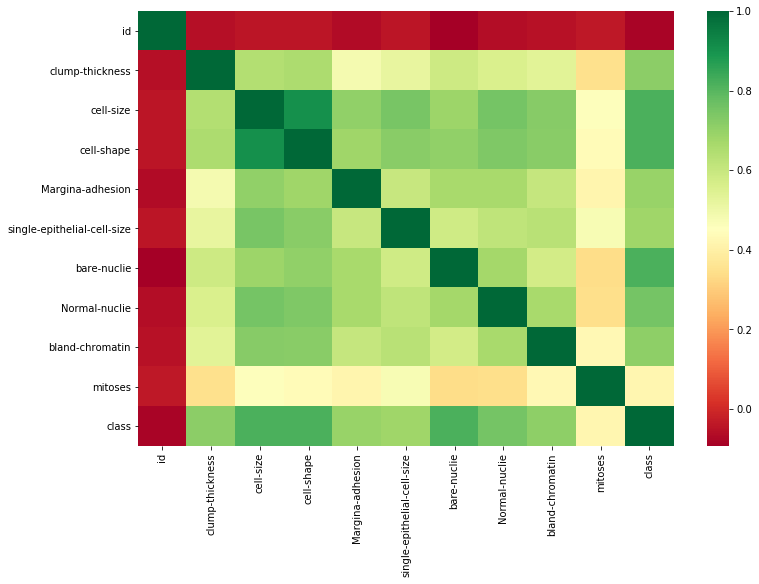

In [327]:
# Check for correlation of variable
plt.figure(figsize=(12,8))
sns.heatmap(can_df.corr(),cmap='RdYlGn')

In [328]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
# Except Mitoses and id remaining having good coorelation 

C:\Users\Veni\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Veni\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


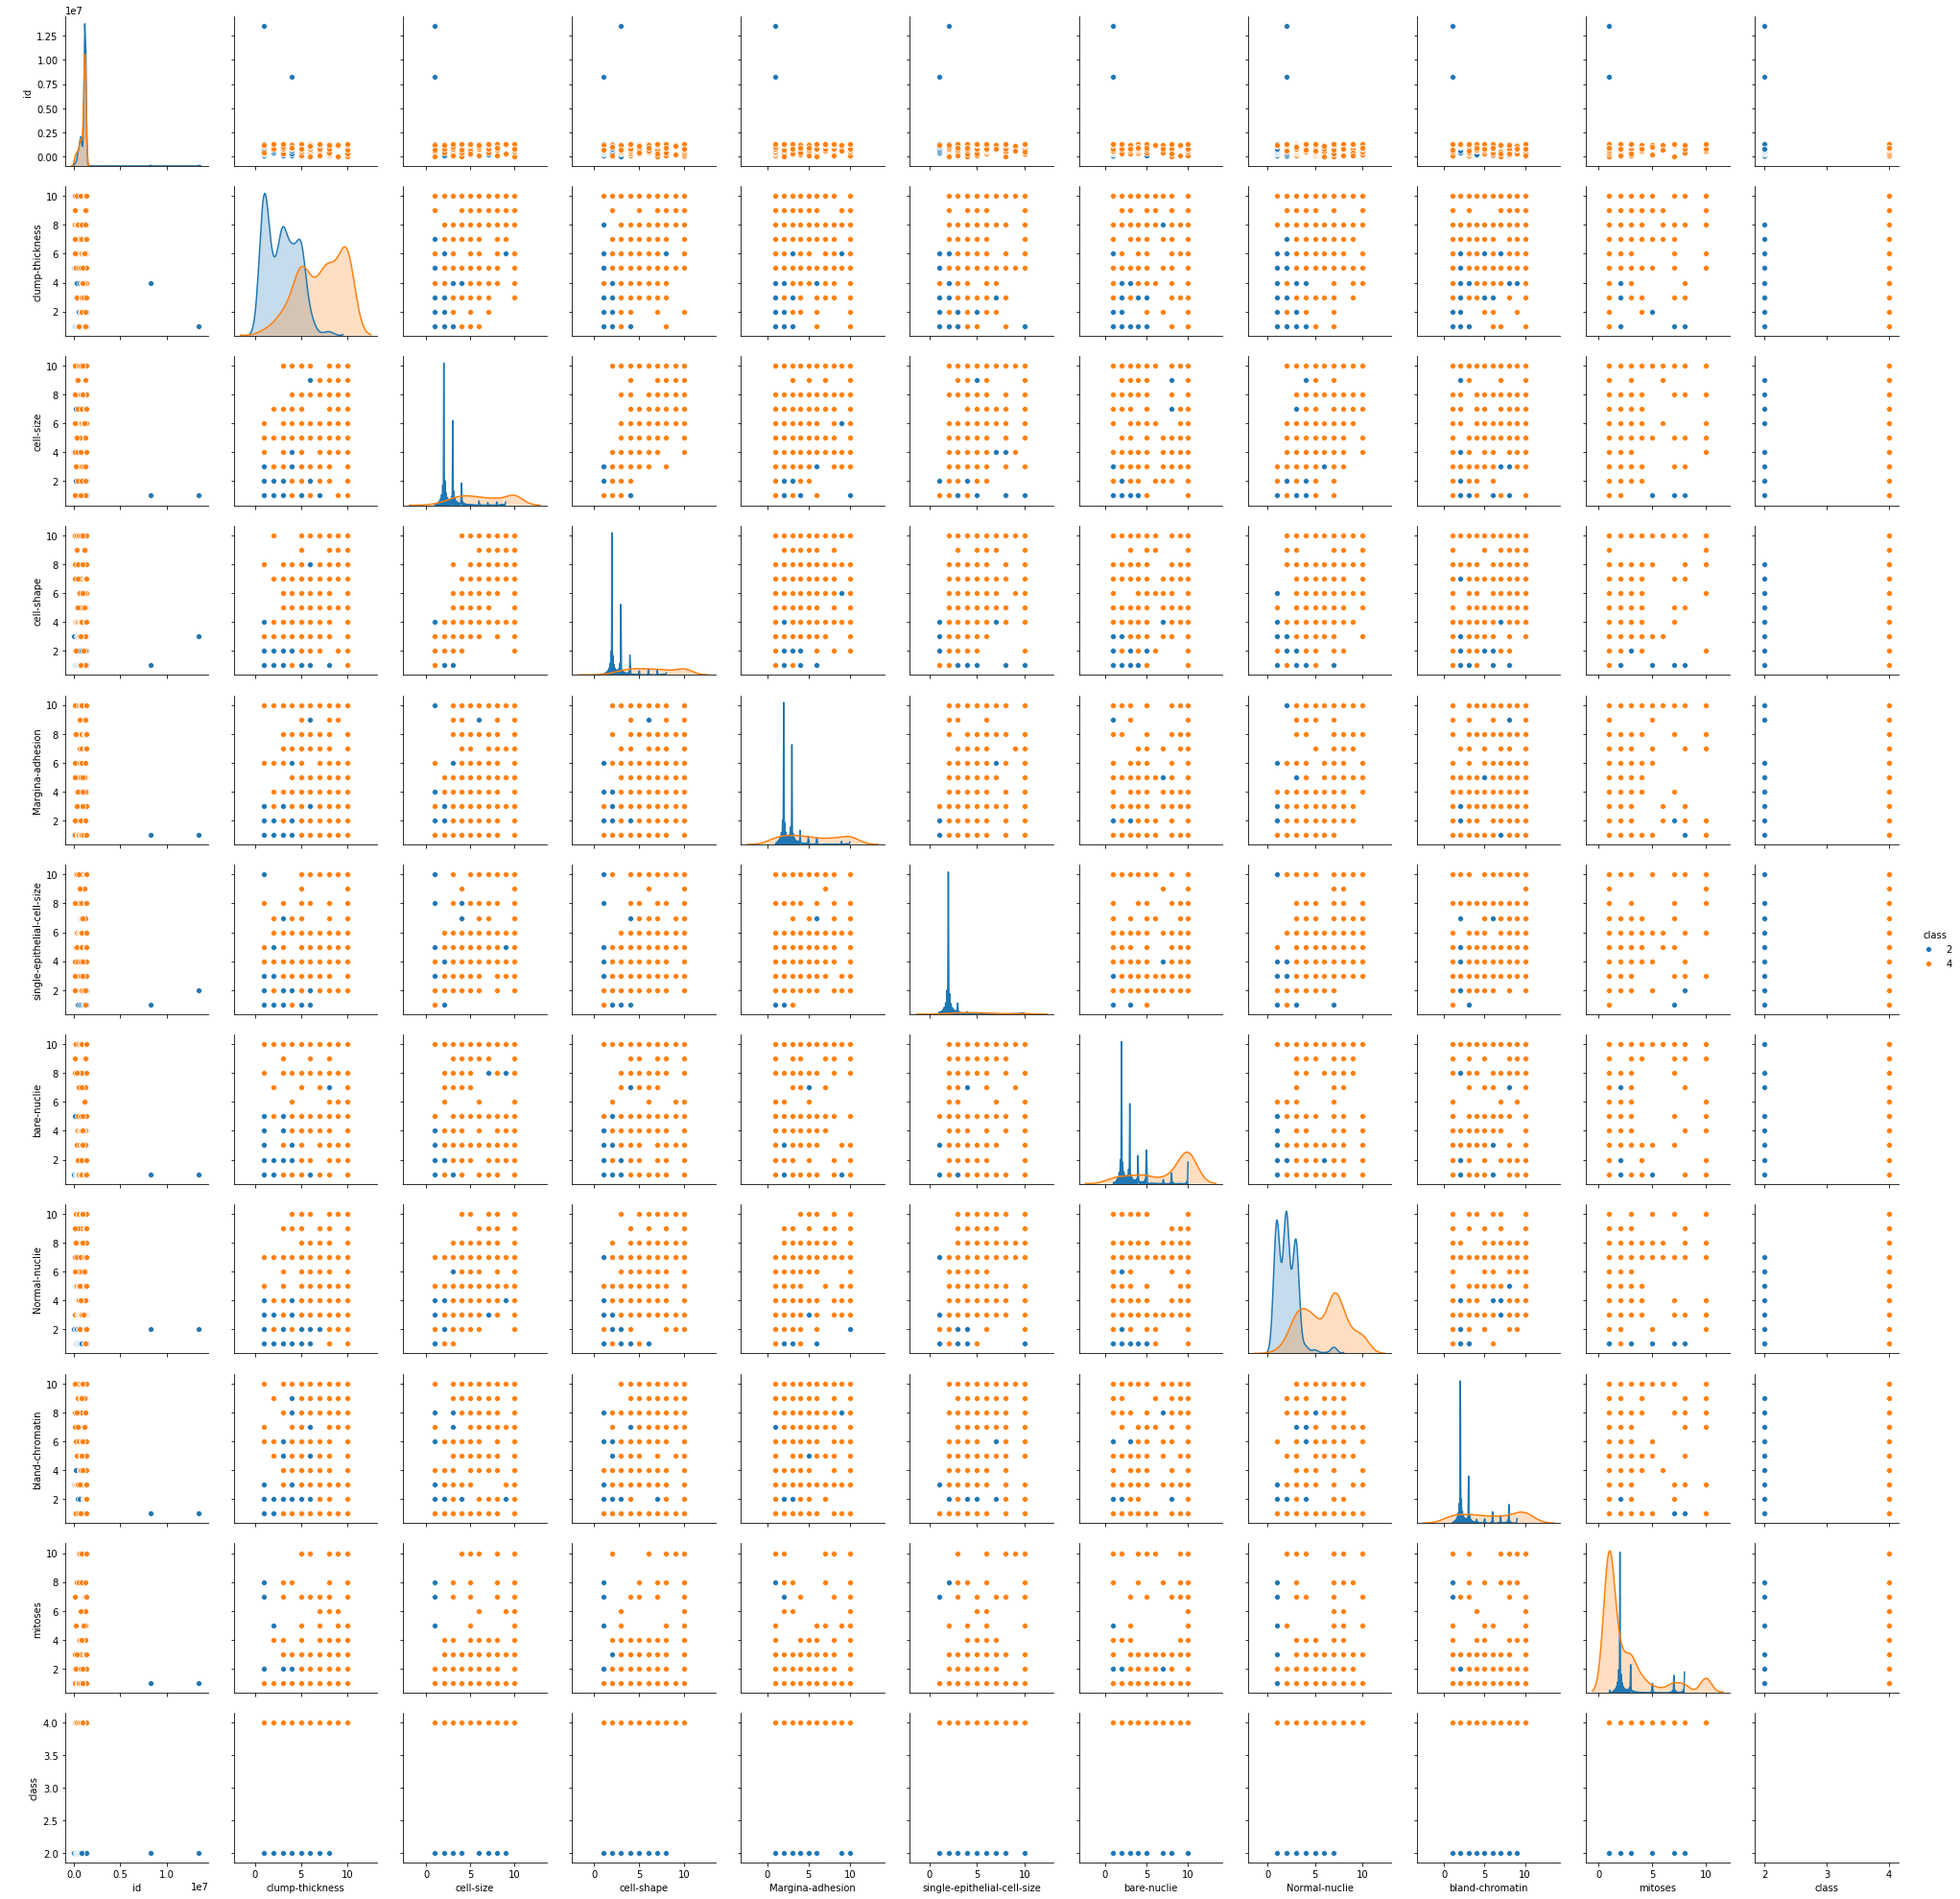

In [329]:
#Let us check for pair plots
sns.pairplot(can_df,hue='class')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276A9AA0128>,
      dtype=object)

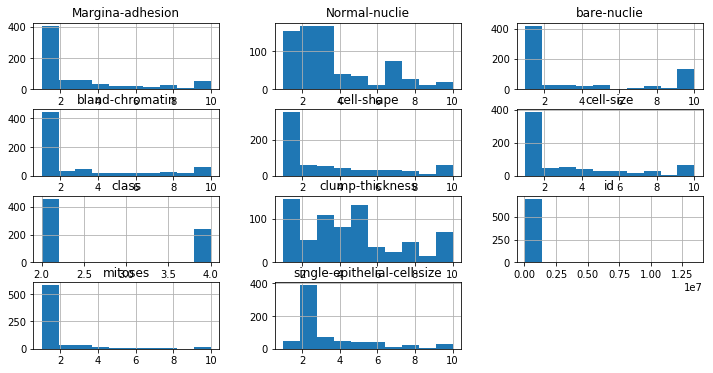

In [331]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10
can_df.hist(figsize=(12,6))

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [332]:
# We could see most of the outliers are now removed.
# removing ID as it doesnt give any contribution towards model building

In [339]:
Feature=can_df.drop(columns=['id','class'])
Target=can_df['class']

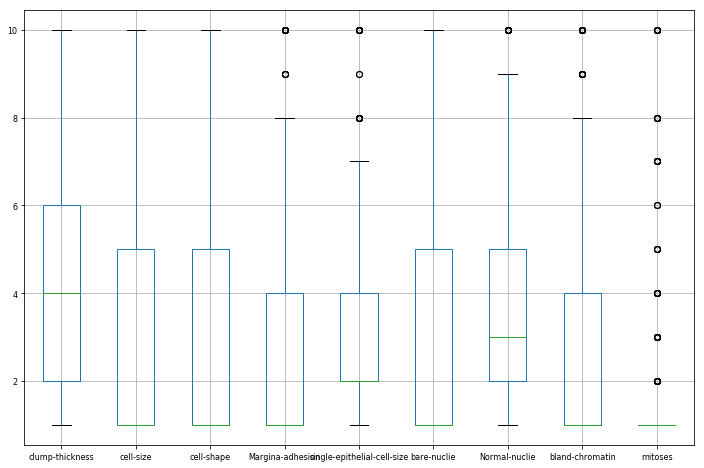

In [340]:
plt.figure(figsize=(12,8))

Feature.boxplot(fontsize=8)


In [341]:
can_df['mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

In [342]:
#changingthe outliers with most occurance values
Feature['mitoses']=Feature['mitoses'].replace((Feature[Feature['mitoses'].apply(lambda x :x>4)]['mitoses']),1)

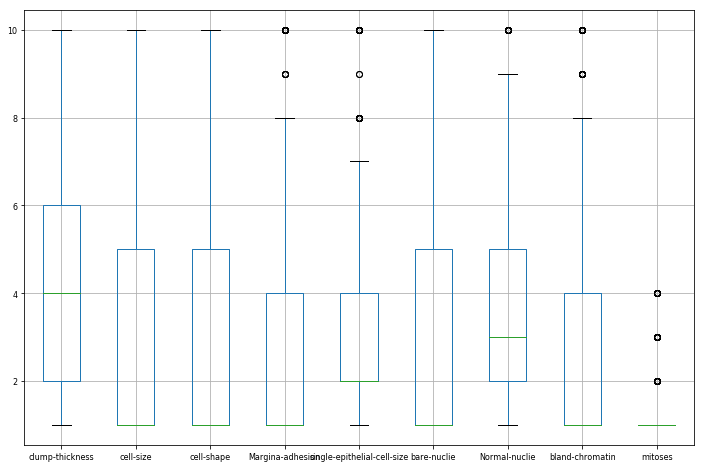

In [343]:
plt.figure(figsize=(12,8))

Feature.boxplot(fontsize=8)


# Q6 Create a covariance matrix for identifying Principal components

In [346]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(Feature)

C:\Users\Veni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Veni\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [347]:
cov_matrix = np.cov(X.T)
cov_matrix

array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.52256381,
        0.5908535 , 0.5592282 , 0.53660222, 0.32197433],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.75287621,
        0.68765657, 0.75680368, 0.72390044, 0.33401218],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.72069948,
        0.70848734, 0.73700282, 0.72047704, 0.29194735],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.60045809,
        0.66792658, 0.66767051, 0.60421681, 0.3374679 ],
       [0.52256381, 0.75287621, 0.72069948, 0.60045809, 1.00143266,
        0.5845377 , 0.61698451, 0.62978166, 0.29819018],
       [0.5908535 , 0.68765657, 0.70848734, 0.66792658, 0.5845377 ,
        1.00143266, 0.67518063, 0.5756016 , 0.35433992],
       [0.5592282 , 0.75680368, 0.73700282, 0.66767051, 0.61698451,
        0.67518063, 1.00143266, 0.66683179, 0.25659946],
       [0.53660222, 0.72390044, 0.72047704, 0.60421681, 0.62978166,
        0.5756016 , 0.66683179, 1.00143266, 0.35398699],


# Q7 Identify eigen values and eigen vector

In [348]:
# Step 2- Get eigen values and eigen vector

In [349]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30772928  0.05219901 -0.00875643 -0.86739576 -0.00245042 -0.01760384
  -0.30141828 -0.24275223 -0.00532442]
 [-0.38405043 -0.11605486 -0.72895093  0.0143078   0.16750083  0.07909637
  -0.03366135  0.47610342 -0.21293672]
 [-0.37981514 -0.15817821  0.66936658 -0.0549446   0.12372691  0.04200003
   0.01648065  0.59663518 -0.07957439]
 [-0.33620866 -0.00934723  0.0394141   0.39558569 -0.4477075   0.09477366
  -0.71032306 -0.11213966  0.04771428]
 [-0.33581985 -0.09687586  0.06649063  0.17650579  0.46842509  0.64319608
   0.12534637 -0.4364136   0.05452512]
 [-0.34071919  0.02870472 -0.08389938 -0.07423101 -0.57708221  0.15700996
   0.52631202  0.03666941  0.48426452]
 [-0.35012433 -0.17859654  0.06727696  0.11385375 -0.1962124  -0.36070791
   0.32473736 -0.36465522 -0.64883748]
 [-0.33933404  0.00207801 -0.03069051  0.17635931  0.40147174 -0.64347337
  -0.02644067 -0.13416385  0.50878975]
 [-0.18415478  0.95738648  0.04495076  0.08475326  0.06373625  0.01289656
   0

# Q8 Find variance and cumulative variance by each eigen vector

In [350]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.28327177  73.82870598  79.82500107  85.21887579  89.52226845
  92.97191608  96.12270732  99.02865838 100.        ]


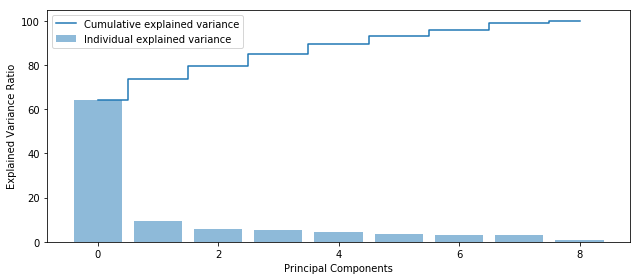

In [351]:
plt.figure(figsize=(9 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [373]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6).fit(X)

In [376]:
pca_transform=pca.transform(X)

In [377]:
pca_transform

array([[-1.45008752, -0.03506156, -0.60141498, -0.01854266, -0.15732556,
         0.09547374],
       [ 1.50004845, -0.46897986,  0.1837704 , -0.60133495,  1.72874212,
        -0.47560445],
       [-1.57468334, -0.06423375, -0.0053785 , -0.17624507, -0.10143187,
        -0.26419146],
       ...,
       [ 4.0456389 ,  0.17991475,  0.80544222,  2.16502704, -0.80639671,
        -0.6299232 ],
       [ 2.31119114, -1.12583363,  0.69741587, -0.06804599, -1.46893868,
        -0.59777913],
       [ 2.70830564, -1.27284699,  0.74272195, -0.35251129, -0.65162669,
        -0.57932806]])

In [364]:
pca_tra_df=pd.DataFrame(pca_transform)

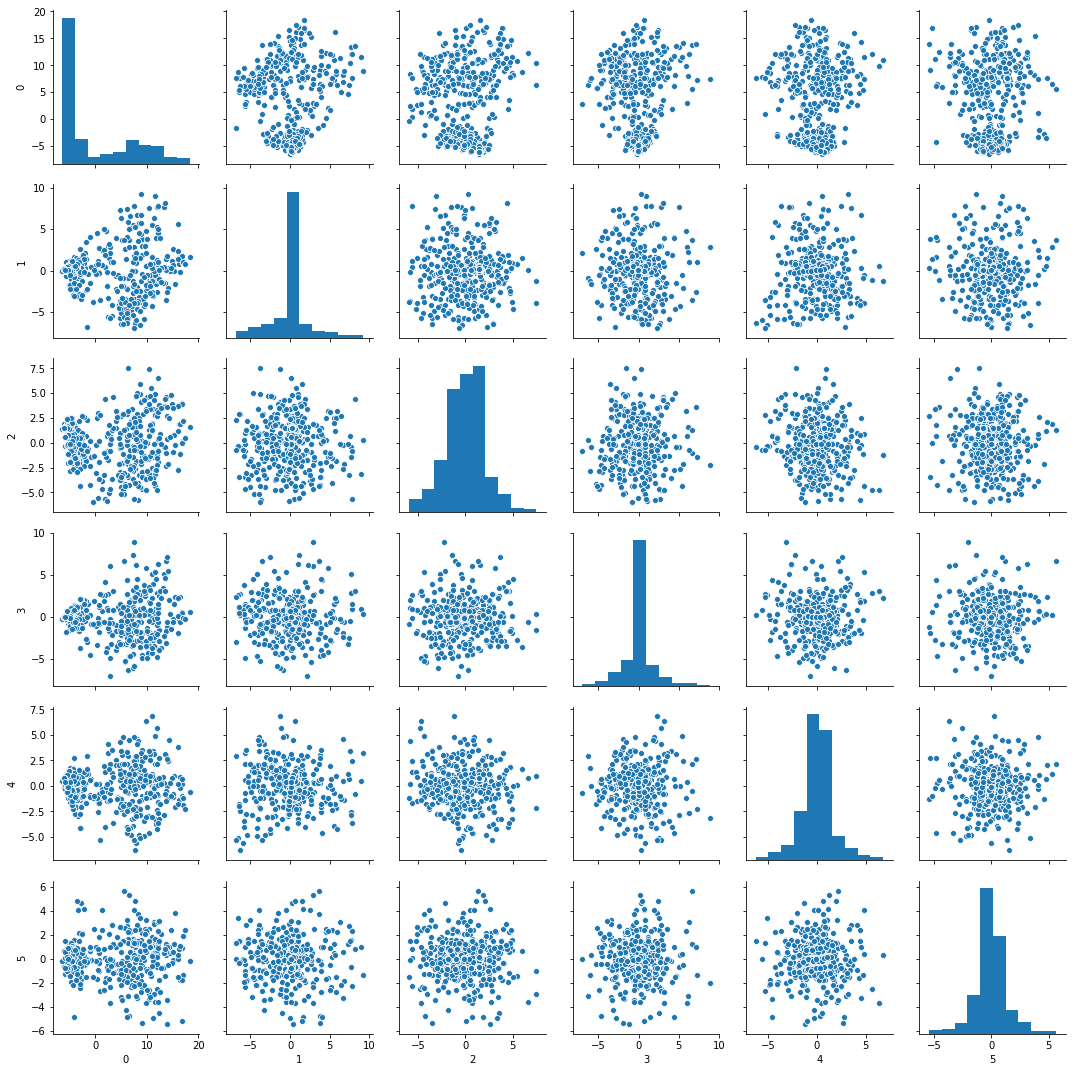

In [379]:
sns.pairplot(pca_tra_df)

array([[ 0.300578  ,  0.4070125 ,  0.39499001,  0.33356927,  0.25073259,
         0.44406129,  0.29478887,  0.35866569,  0.03330619],
       [-0.04848154,  0.23991756,  0.18084208, -0.11178122,  0.17600502,
        -0.78545152,  0.03393943,  0.49569374, -0.01068532],
       [-0.85057789, -0.01841959, -0.06836028,  0.4787729 ,  0.04929732,
         0.07165129,  0.11477396,  0.14669409, -0.00499979],
       [ 0.03743807,  0.32788307,  0.24466211,  0.3702526 ,  0.18520558,
        -0.32554179,  0.00361391, -0.74339681, -0.03484418],
       [-0.41764505,  0.29166708,  0.3348702 , -0.69179372,  0.24871653,
         0.24038011, -0.00706972, -0.16804894, -0.04305108],
       [-0.03141568,  0.04375124,  0.04104297, -0.14224645, -0.51673463,
        -0.10670163,  0.82444676, -0.1146944 , -0.06255497]])

# Q10 Find correlation between components and features

In [358]:
pca_df=pd.DataFrame(pca.components_,columns=Feature.columns)

In [360]:
pca_df

,clump-thickness,cell-size,cell-shape,Margina-adhesion,single-epithelial-cell-size,bare-nuclie,Normal-nuclie,bland-chromatin,mitoses
0,0.300578,0.407013,0.394990,0.333569,0.250733,0.444061,0.294789,0.358666,0.033306
1,-0.048482,0.239918,0.180842,-0.111781,0.176005,-0.785452,0.033939,0.495694,-0.010685
2,-0.850578,-0.018420,-0.068360,0.478773,0.049297,0.071651,0.114774,0.146694,-0.005000
3,0.037438,0.327883,0.244662,0.370253,0.185206,-0.325542,0.003614,-0.743397,-0.034844
4,-0.417645,0.291667,0.334870,-0.691794,0.248717,0.240380,-0.007070,-0.168049,-0.043051
5,-0.031416,0.043751,0.041043,-0.142246,-0.516735,-0.106702,0.824447,-0.114694,-0.062555


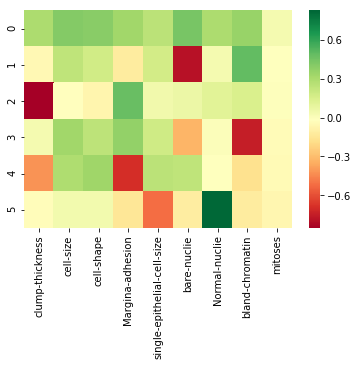

In [372]:
sns.heatmap(pca_df,cmap='RdYlGn')

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [366]:
jokes_df=pd.read_csv('jokes.csv',nrows=200)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [380]:
jokes_df=jokes_df.drop(columns=['NumJokes'])

In [381]:
jokes_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [382]:
jokes_df.columns=range(100)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [383]:
jokes_df=jokes_df.replace(99,0)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [385]:
rattings_diff=StandardScaler().fit_transform(jokes_df)


In [394]:
rattings_diff=pd.DataFrame(rattings_diff)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [395]:
mean_of_rattings=rattings_diff.mean(axis=1)

In [399]:
mean_of_rattings.argsort()[:-10:-1]

199     94
198     44
197     86
196    159
195    109
194     13
193     17
192     73
191     46
dtype: int64